## Code to Plot Voltage and Current Traces from Recordings
This code should be run in the same location where the V/I recordings are located from a stimulation run

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
### EDIT THIS LIST ###
# Include channel labels for all channels with saved data
channel_list = ['5V']

In [3]:
# Looks through the folder where this code file is located and selects and orders the recording files
directory = os.getcwd()
data_sets = []
file_names = []
for channel in channel_list:
    dict = {}
    names = []
    for root,dirs,files in os.walk(directory):
        for file in sorted(files):
           if file.endswith(".csv"):
               if channel in file:
                   f=open(file, 'r')
                   data = pd.read_csv(f)
                   file_name = file.split('.')[0]
                   dict[file_name] = data
                   f.close()
                   names.append(file_name)
    data_sets.append(dict)
    file_names.append(names)

In [4]:
#lists file names that the code found, make sure this matches what you think it should
file_names

[['5V_1']]

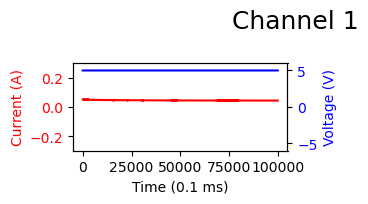

In [5]:
# plots the traces and labels each by channel
for i, channel_data in enumerate(data_sets):
    num_stims = len(channel_data)
    rows = 2
    cols = num_stims // rows + (num_stims % rows > 0)
    
    # Create grid of subplots
    plt.figure(figsize=(6,cols*2))
    plt.suptitle(f"Channel {i+1}", fontsize=18, y=1)
    for n, file in enumerate(file_names[i]):
        data = channel_data[file]
    # add a new subplot iteratively
        ax = plt.subplot(cols, rows, n+1)
        # ax.set_xlim(0,10000)
        # Current plot (left y-axis)
        ax.set_xlabel('Time (0.1 ms)')
        ax.set_ylabel('Current (A)', color='red')
        ax.plot(data["A"], color='red', label='Stim1 Current')
        ax.tick_params(axis='y', labelcolor='red')
        ax.set_ylim(-0.3,0.3)

        # Voltage plot (right y-axis)
        axt = ax.twinx()  
        axt.set_ylabel('Voltage (V)', color='blue')
        axt.plot(data["V"], color='blue', label='Stim1 Voltage')
        axt.tick_params(axis='y', labelcolor='blue')
        axt.set_ylim(-6,6)
    plt.tight_layout()
    plt.show()